In [ ]:
import pandas as pd
import json
from pathlib import Path
import pyrootutils

root = pyrootutils.setup_root(".")

In [2]:
file_list = [root / 'data/MM17-WeiboRumorSet/tweets/test_nonrumor.txt', root / 'data/MM17-WeiboRumorSet/tweets/test_rumor.txt', root / 'data/MM17-WeiboRumorSet/tweets/train_nonrumor.txt', root / 'data/MM17-WeiboRumorSet/tweets/train_rumor.txt']

In [3]:
def read_data(path):
    data = []
    with open(path, 'r', encoding='utf-8') as infile:
        for i, line in enumerate(infile):
            data.append(list(line.strip().split('|')))
    return data

In [4]:
data_list = [read_data(file) for file in file_list]

In [5]:
format_data = {}
for split_name, data in zip(file_list, data_list):
    name = split_name.split('/')[-1].split('.')[0]
    format_data[name] = []
    for i, d in enumerate(data):
        if i % 3 == 0:
            format_data[name].append({})
            format_data[name][-1]['meta_data'] = d
        if i % 3 == 1:
            format_data[name][-1]['imgs'] = [img for img in d if img != 'null']
        else:
            format_data[name][-1]['title'] = d
        format_data[name][-1]['label'] = 0 if 'nonrumor' in name else 1

In [6]:
for k, v in format_data.items():
    with open(f'{k}_format.json', 'w', encoding='utf-8') as outfile:
        for d in v:
            line = json.dumps(d, ensure_ascii=False)
            outfile.write(line + '\n')

In [7]:
json_file_list = ['/data/fake_news/datasets/MM17-WeiboRumorSet/test_nonrumor_format.json', '/data/fake_news/datasets/MM17-WeiboRumorSet/test_rumor_format.json', '/data/fake_news/datasets/MM17-WeiboRumorSet/train_nonrumor_format.json', '/data/fake_news/datasets/MM17-WeiboRumorSet/train_rumor_format.json']

In [8]:
dfs = [pd.read_json(file, lines=True) for file in json_file_list]

In [9]:
dfs[0]

,meta_data,title,label,imgs
0,"[3907393559904503, null, null, null, 144707868...",[【每日美图】西西里的希腊古城塞利侬特（Selinunte）],0,[http://ww3.sinaimg.cn/large/62b31d36gw1exv2qu...
1,"[3906304541874867, null, null, null, 144681904...",[【奥迪金属3D打印出经典赛车】图一是奥迪前身汽车联盟（Auto Union）1936年制造...,0,[http://ww2.sinaimg.cn/large/62b31d36jw1exrlv0...
2,"[3906158693319838, null, null, null, 144678426...",[#紫禁城的初雪#意料之外的密匝纷扬。今日入宫，可择一隅，静听碎玉……大家一起#随手拍初雪#吧~],0,[http://ww2.sinaimg.cn/large/62aad664jw1exr574...
3,"[3905734426842963, null, null, null, 144668311...",[【移民：分配的村子太烂，我们走了】媒体报道，部分被分配到东德小村Sumte的移民，因为失望...,0,[http://ww3.sinaimg.cn/large/62b31d36gw1expshp...
4,"[3927954943579650, null, null, null, 145198089...",[【#台媒称贵阳是广西省会#惹怒网友】 网友@虎爷John 爆料称：“近日，@经济学人集团 ...,0,[http://ww4.sinaimg.cn/large/74dc66e0gw1ezoohu...
...,...,...,...,...
991,"[3896157270699471, null, null, null, 144439974...",[【空城记：刘小东与鄂尔多斯】#正午故事#鄂尔多斯是个比较敏感的城市。其实政府也比想象的聪明...,0,[http://ww1.sinaimg.cn/large/005EHRy1jw1ewv1ay...
992,"[3895644894378737, null, null, null, 144427758...",[【日本人是怎么拍黑帮电影的？】Tim Gallo出生于俄国，17岁后迁往日本生活。通过用镜...,0,[http://ww3.sinaimg.cn/large/005EHRy1jw1ewtlhd...
993,"[3893257346088858, null, null, null, 144370834...",[#跟着面叔看世界#第一站，日本东京筑地市场。你现在到哪儿了？不会还堵在路上吧？一起来晒晒旅...,0,[http://ww3.sinaimg.cn/large/005EHRy1jw1ewlzj5...
994,"[3892828281041275, null, null, null, 144360605...",[【现场图·广西柳城县连续发生多起爆炸】据@南宁电视台 ：网友称，现场听到几声巨响，车站，市...,0,[http://ww3.sinaimg.cn/large/61e04755jw1ewkm8o...


In [10]:
def check_valid_image(img_root_dir, img_path_list):
    valid_img_list = []
    for url in img_path_list:
        img_name = url.split('/')[-1]
        real_path = img_root_dir / img_name
        if real_path.exists():
            valid_img_list.append(img_name)
        else:
            print(f'{img_name} not exists')
    return valid_img_list

In [11]:
for df in dfs:
    df['imgs'] = df.imgs.apply(lambda x: check_valid_image(Path('/data/fake_news/datasets/MM17-WeiboRumorSet/images'), x))

62b31d36gw1exv2qu0x0ij20hm0bn0v8.jpg not exists
62b31d36gw1exv2qx1wtrj20hm0aumz4.jpg not exists
62b31d36gw1exv2qz6zw2j20hm07dwft.jpg not exists
62b31d36gw1exv2r1ksnhj20hm07cq3u.jpg not exists
62b31d36gw1exv2r80vejj208i0bk0ul.jpg not exists
62b31d36gw1exv2rbq7muj20hm0e00tu.jpg not exists
62b31d36gw1exv2rf6tnej208i0gv3zb.jpg not exists
62b31d36gw1exv2roz3upj20hm0m0afv.jpg not exists
62b31d36jw1exrlv0oyypj20go0cadj1.jpg not exists
62b31d36jw1exrlv48l8rj20zk0hs76n.jpg not exists
62aad664jw1exr574z61xj20u01hcanf.jpg not exists
62aad664jw1exr576bt47j20u01hck36.jpg not exists
62aad664jw1exr576oe1oj20u01hc4g0.jpg not exists
62aad664jw1exr5778b8bj20u01hcqek.jpg not exists
62aad664jw1exr577l36rj20u01hcwyh.jpg not exists
62aad664jw1exr5781cq7j20u01hcnad.jpg not exists
62aad664jw1exr578m0tlj20u01hc7fi.jpg not exists
62b31d36gw1expshp70k2j20hm0btmyk.jpg not exists
62b31d36gw1expshtpnlrj20hm0br76y.jpg not exists
62b31d36gw1expshufgp2j20hm0c1dh8.jpg not exists
62b31d36gw1expshwcfsjj20hm0bq40l.jpg not

In [12]:
dfs[0]

,meta_data,title,label,imgs
0,"[3907393559904503, null, null, null, 144707868...",[【每日美图】西西里的希腊古城塞利侬特（Selinunte）],0,[62b31d36gw1exv2rkjkpmj208i0gvabr.jpg]
1,"[3906304541874867, null, null, null, 144681904...",[【奥迪金属3D打印出经典赛车】图一是奥迪前身汽车联盟（Auto Union）1936年制造...,0,[62b31d36jw1exrlv6qlptj20go0cignl.jpg]
2,"[3906158693319838, null, null, null, 144678426...",[#紫禁城的初雪#意料之外的密匝纷扬。今日入宫，可择一隅，静听碎玉……大家一起#随手拍初雪#吧~],0,"[62aad664jw1exr575cusqj20u01hc7fr.jpg, 62aad66..."
3,"[3905734426842963, null, null, null, 144668311...",[【移民：分配的村子太烂，我们走了】媒体报道，部分被分配到东德小村Sumte的移民，因为失望...,0,"[62b31d36gw1expsi2gfrdj20hm0loq8o.jpg, 62b31d3..."
4,"[3927954943579650, null, null, null, 145198089...",[【#台媒称贵阳是广西省会#惹怒网友】 网友@虎爷John 爆料称：“近日，@经济学人集团 ...,0,"[74dc66e0gw1ezoohuv5jjj20hs0dcwg8.jpg, 74dc66e..."
...,...,...,...,...
991,"[3896157270699471, null, null, null, 144439974...",[【空城记：刘小东与鄂尔多斯】#正午故事#鄂尔多斯是个比较敏感的城市。其实政府也比想象的聪明...,0,[005EHRy1jw1ewv1azxwh1j30rs0lljzm.jpg]
992,"[3895644894378737, null, null, null, 144427758...",[【日本人是怎么拍黑帮电影的？】Tim Gallo出生于俄国，17岁后迁往日本生活。通过用镜...,0,[005EHRy1jw1ewtlhknf30j30jg0czq4y.jpg]
993,"[3893257346088858, null, null, null, 144370834...",[#跟着面叔看世界#第一站，日本东京筑地市场。你现在到哪儿了？不会还堵在路上吧？一起来晒晒旅...,0,"[005EHRy1jw1ewlzj6oenaj30qo0zkdm5.jpg, 005EHRy..."
994,"[3892828281041275, null, null, null, 144360605...",[【现场图·广西柳城县连续发生多起爆炸】据@南宁电视台 ：网友称，现场听到几声巨响，车站，市...,0,"[61e04755jw1ewkm8o7fyyj20c80gb0u2.jpg, 61e0475..."


In [13]:
for df in dfs:
    df['title'] = df.title.apply(lambda x: ''.join(x))

In [14]:
test_data = pd.concat(dfs[:2])
train_data = pd.concat(dfs[2:])

In [15]:
len(train_data), len(test_data)

(7531, 1996)

<AxesSubplot:>

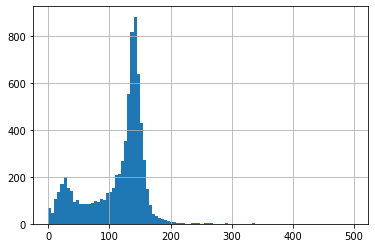

In [16]:
train_data.title.apply(len).hist(bins=100)

<AxesSubplot:>

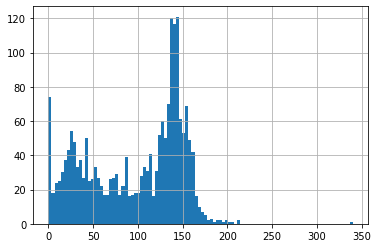

In [17]:
test_data.title.apply(len).hist(bins=100)

<AxesSubplot:ylabel='imgs'>

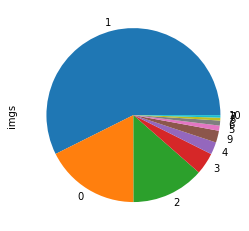

In [18]:
train_data.imgs.apply(len).value_counts().plot.pie()

<AxesSubplot:ylabel='imgs'>

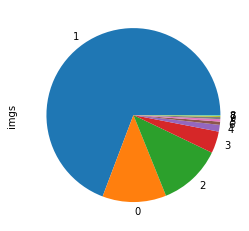

In [19]:
test_data.imgs.apply(len).value_counts().plot.pie()

In [20]:
train_data_with_img = train_data[train_data.imgs.apply(len) > 0]
test_data_with_img = test_data[test_data.imgs.apply(len) > 0]

In [21]:
len(train_data_with_img), len(test_data_with_img)

(6202, 1759)

<AxesSubplot:ylabel='imgs'>

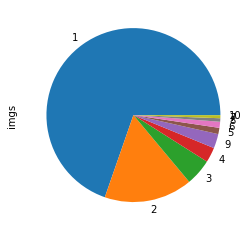

In [22]:
train_data_with_img.imgs.apply(len).value_counts().plot.pie()

<AxesSubplot:ylabel='imgs'>

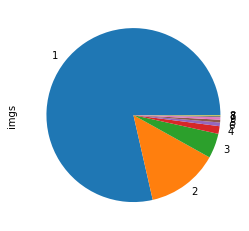

In [23]:
test_data_with_img.imgs.apply(len).value_counts().plot.pie()